In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('vehicle.csv')

In [4]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [5]:
df.shape

(846, 19)

Checking Data Type and Missing Values

In [6]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

class
bus    218
car    429
van    199
dtype: int64


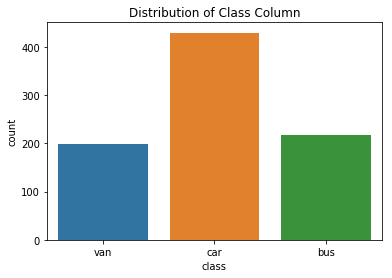

In [8]:
#Distribution of Class Column
pt = sns.countplot(x='class',data=df)
pt.set_title("Distribution of Class Column")
print(df.groupby("class").size())

In the Class column, car is almost 50% of the data and Van & bus are almost same in number. 

Statistical Summary

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [10]:
df_new = df.drop('class',axis=1)

In [11]:
df_new.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


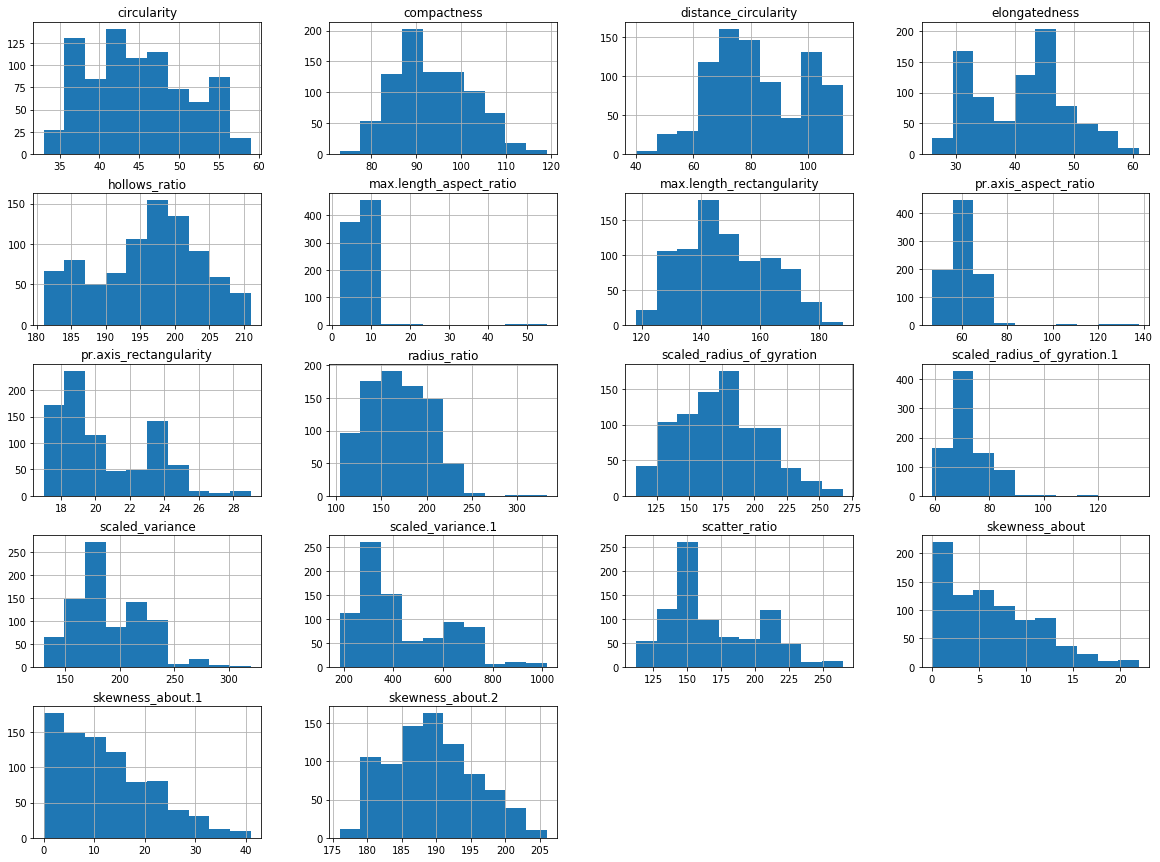

In [12]:
df_new.hist(figsize=(20,15))
plt.show()

In [13]:
#Missing Value Handling -- Replacing missing values with the median
for cols in df_new.columns:
    df_new[cols] = df_new[cols].fillna(df_new[cols].median())

In [14]:
#Converting the float64 to int64 for plotting the displot
for cols in df_new.columns:
    df_new[cols] = df_new[cols].astype('int64')

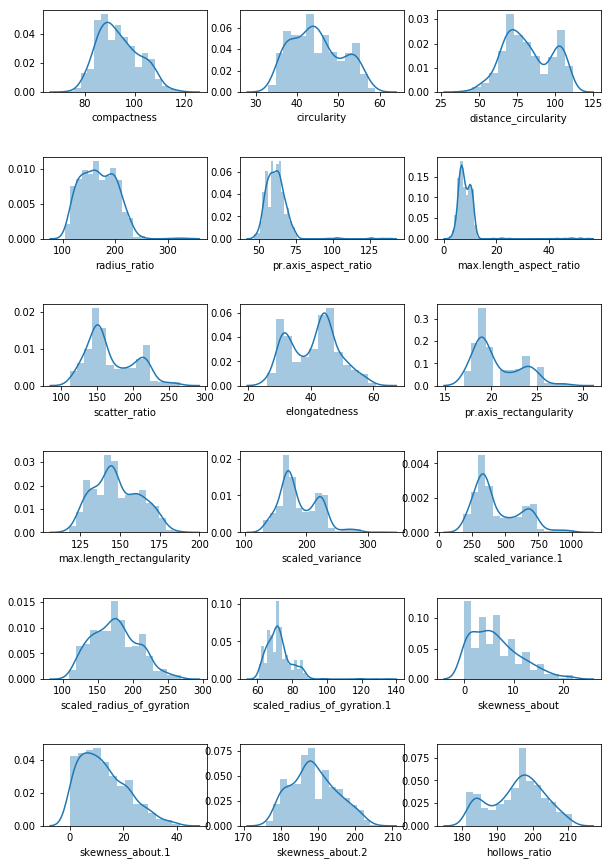

In [15]:
fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(10,15))
plt.subplots_adjust(hspace=0.8, wspace=0.2)

for cols,ax in zip(df_new.columns,axes.flat):
    sns.distplot(df_new[cols], hist=True, ax=ax)
    ax.set(xlabel=cols)

Observations from Distribution of columns
1. Column skweness_about, skewness_about.1 are left skewed
2. Columns like radius_ratio,pr.axis_aspect_ratio,max.length_rectangularity,scaled_radius_of_gyration.1, etc have long tail. 
3. Distribution of columns - distance_circularity,scatter_ratio,elongatedness,scaled_variance, scaled_variance_1, hollows_ratio have 2 peaks. 

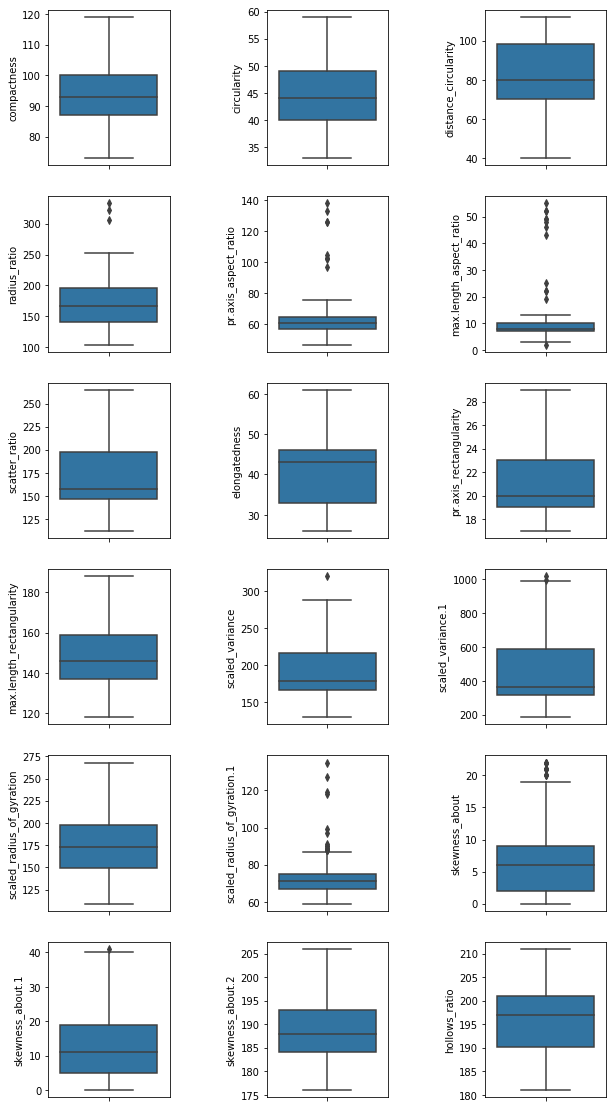

In [16]:
#Checking Outliers
fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(10,20))
plt.subplots_adjust(hspace=0.2, wspace=0.8)
for cols,ax in zip(df_new,axes.flat): 
    sns.boxplot(y = cols, data= df_new,ax=ax)

In [17]:
#Remove Outliers 
outliers_cols = ['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1','skewness_about']
for cols in outliers_cols:
    UC = df_new[cols].quantile(q = 0.75) + 1.5*(df_new[cols].quantile(q = 0.75) - df_new[cols].quantile(q = 0.25))
    df_new[cols]= np.where(df_new[cols].values > UC,df_new[cols].values.mean(),df_new[cols].values)

Text(0.5, 1.0, 'Correlation between features')

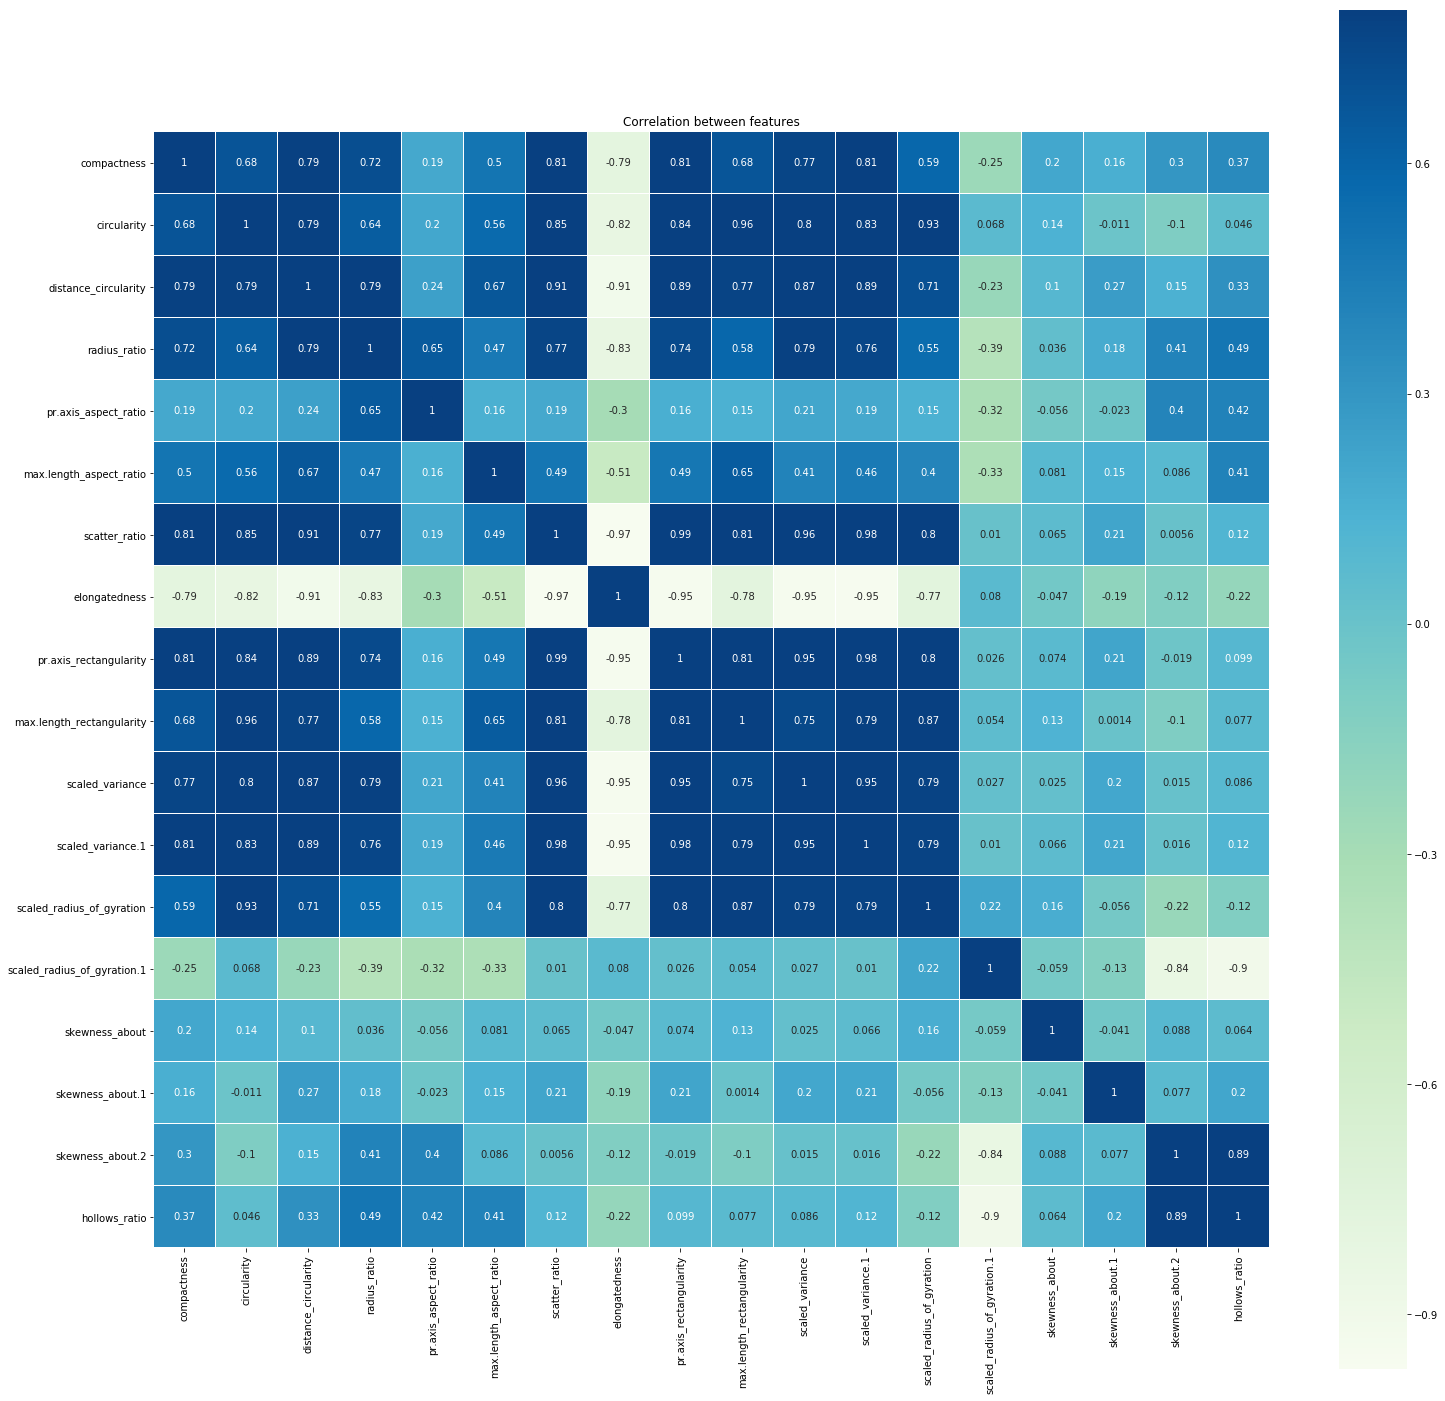

In [18]:
#Correlation between the columns
corr = df_new.corr()
plt.figure(figsize=(25,25))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='GnBu',linecolor="white")
plt.title('Correlation between features')

Observations from Heat Map
1. Columns 'compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'scatter_ratio', 'pr.axis_rectangularity','max.length_rectangularity','scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration' have high corelation. 
2. Column 'hollows_ratio' and 'skewness_about.2' are highly corelated
3. 'pr.axis_aspect_ratio', 'max.length_aspect_ratio'are not corelated much with other columns
4. 'scaled_radius_of_gyration.1' has high negative corealtion with skewness_about.2 and hollows_ratio columns but it has very less corelation with others.

In [19]:
#split the dataset into highly corelated columns and low corelated columns
df_HC = df[['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'scatter_ratio', 'pr.axis_rectangularity','max.length_rectangularity','scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','elongatedness','class']]
df_LC = df[['hollows_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','class']]

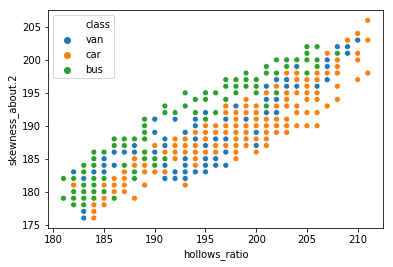

In [20]:
sns.scatterplot(x = 'hollows_ratio',y = 'skewness_about.2',hue ='class' ,data= df_LC)

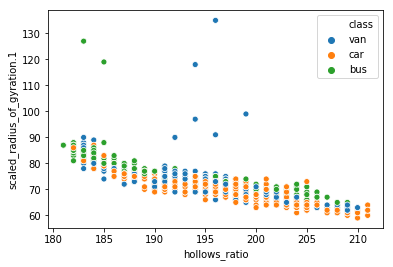

In [21]:
sns.scatterplot(x = 'hollows_ratio',y = 'scaled_radius_of_gyration.1',hue='class',data= df_LC)

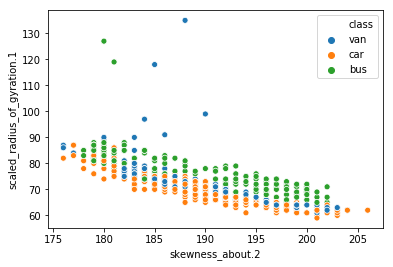

In [22]:
sns.scatterplot(x = 'skewness_about.2',y = 'scaled_radius_of_gyration.1',hue='class',data= df_LC)

Feature Selection
1. skewness_about.2,scaled_radius_of_gyration.1,hollows_ratio are highly corelated to each to other. Therefore we can use only one variable from three in the model. 
2. pr.axis_aspect_ratio, max.length_aspect_ratio, skewness_about, skewness_about.1 are not corelated with other columns - so we will including these features in the model. 

In [23]:
#dropping skewness_about.2,scaled_radius_of_gyration.1
X = df_new.drop(['skewness_about.2','scaled_radius_of_gyration.1'],axis = 1)
y = df['class']
HC_cols = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'scatter_ratio', 'pr.axis_rectangularity',
           'max.length_rectangularity','scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','elongatedness']
LC_cols = ['hollows_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','skewness_about','skewness_about.1']

In [24]:
#Only selecting highly corelated columns
X = X[HC_cols]

In [25]:
#Scale the data
scaler = StandardScaler()
X_sd = scaler.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
#covariance matrix
cov_matrix = np.cov(X_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.72271419  0.81358214  0.81465658
   0.67694334  0.77083809  0.80938953  0.58597038 -0.78968322]
 [ 0.68569786  1.00118343  0.79325751  0.63912175  0.8489411   0.84439802
   0.96245572  0.8038924   0.83082229  0.92692098 -0.82244387]
 [ 0.79086299  0.79325751  1.00118343  0.79519797  0.90614687  0.89408198
   0.77544391  0.8707286   0.88670202  0.70662768 -0.9123854 ]
 [ 0.72271419  0.63912175  0.79519797  1.00118343  0.77076945  0.74492213
   0.58029808  0.78742045  0.76163493  0.55156508 -0.82630723]
 [ 0.81358214  0.8489411   0.90614687  0.77076945  1.00118343  0.99092181
   0.81004084  0.96191929  0.98473008  0.80083997 -0.97275069]
 [ 0.81465658  0.84439802  0.89408198  0.74492213  0.99092181  1.00118343
   0.81189327  0.94827844  0.97811224  0.79765341 -0.95011894]
 [ 0.67694334  0.96245572  0.77544391  0.58029808  0.81004084  0.81189327
   1.00118343  0.75132737  0.79246627  0.86748567 -0.77677186]
 [ 0.77083809  0.80

In [27]:
#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-2.76118369e-01  2.86391092e-01 -6.96731319e-01  4.61062802e-01
   3.23264142e-01 -1.66561651e-01 -5.27540612e-02  9.11084166e-02
  -3.44172946e-03  1.96663990e-02  7.17306542e-04]
 [-2.99063250e-01 -4.23615837e-01 -1.92514103e-01 -1.68908155e-01
  -5.41267881e-03  1.34994577e-01  2.46243435e-02  9.40168843e-02
  -5.01694003e-02 -6.53360193e-02  7.94377127e-01]
 [-3.05377950e-01  1.59389041e-01 -7.68449397e-02 -7.68332221e-02
  -7.18743107e-01 -5.75202674e-01 -1.58734514e-03 -1.36097333e-01
  -4.27247423e-03  3.66792855e-02  4.68247233e-02]
 [-2.66675548e-01  4.44764213e-01 -1.77591573e-01 -7.60692649e-01
   2.22792359e-01  1.40621238e-01  1.18857584e-01 -1.65734606e-01
   2.89441188e-02 -5.54604187e-02 -7.71841960e-02]
 [-3.23199742e-01  7.37348063e-02  2.19189131e-01  1.80474002e-01
  -2.46240688e-02  1.39319341e-01  1.39142055e-01  4.93771032e-02
   8.53125515e-01 -1.99230674e-01  1.26303381e-02]
 [-3.20425021e-01  5.27772237e-02  1.97681511e-01  2.55373520e-01
  -2.

In [28]:
#PCA
pca = PCA(n_components=11)
X_pca = pca.fit_transform(X)

In [29]:
X_pca = pd.DataFrame(data = X_pca)

In [30]:
X_pca.shape

(846, 11)

In [31]:
print(pca.explained_variance_)

[3.40568542e+04 4.98285215e+02 3.96656143e+02 8.93342874e+01
 6.39579531e+01 2.74663522e+01 1.93121779e+01 1.77675109e+01
 2.19781234e+00 1.21013311e+00 1.11172690e-01]


In [32]:
print(pca.components_)

[[ 3.61982042e-02  2.79253544e-02  7.61099539e-02  1.34582374e-01
   1.77477028e-01  1.37350598e-02  6.29556938e-02  1.60266899e-01
   9.44067321e-01  1.40592267e-01 -4.04942829e-02]
 [ 6.05702012e-02 -8.18645996e-02  8.42133987e-02  7.10831396e-01
  -6.96470865e-03 -3.44715536e-03 -2.00761462e-01  5.05863483e-02
  -5.18627315e-03 -6.58263351e-01 -3.15308953e-02]
 [ 2.18676209e-02  1.05494640e-01  1.23973809e-01  6.34153372e-01
   7.28522935e-02  2.90753103e-03  2.11111223e-01  1.89161344e-01
  -2.62243072e-01  6.43375829e-01 -5.00292408e-02]
 [-6.55855480e-02 -8.34407505e-02 -8.93485010e-03 -1.93760060e-01
   2.60094627e-01  1.60151787e-02 -2.81155225e-01  8.81294810e-01
  -1.42015823e-01 -5.09892162e-02 -6.86329813e-02]
 [ 2.15924352e-01  1.18943853e-01  6.43979981e-01 -1.70495239e-01
   3.52499515e-01  2.92194516e-02  5.33260836e-01  2.25214994e-02
  -1.10981026e-01 -2.56447542e-01 -8.59304402e-02]
 [ 1.71380820e-01  1.45779875e-01 -6.74625350e-01  4.64163093e-02
  -9.71812029e-03  

In [33]:
print(pca.explained_variance_ratio_)

[9.68262761e-01 1.41666348e-02 1.12772416e-02 2.53984303e-03
 1.81837418e-03 7.80889682e-04 5.49060186e-04 5.05144105e-04
 6.24855083e-05 3.44050223e-05 3.16072575e-06]


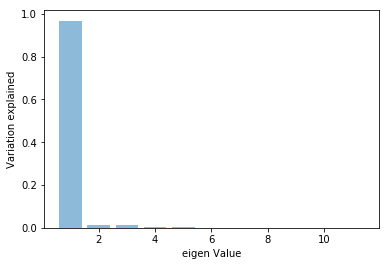

In [34]:
plt.bar(list(range(1,12)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

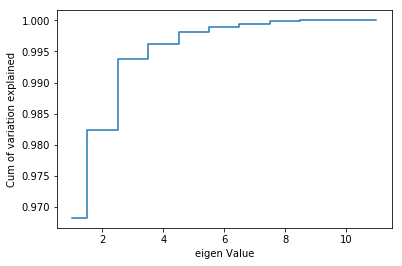

In [35]:
plt.step(list(range(1,12)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

99.5% of information is captured by first 4 components.

In [48]:
#merging PCA cols with Low corelated variables
X = df_new.drop(['skewness_about.2','scaled_radius_of_gyration.1'],axis = 1)
X_sd = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_LC = X_sd[LC_cols]
X_selectedPCA = X_pca.iloc[:,0:4]
X_merged = pd.merge(X_selectedPCA,X_LC,right_index=True,left_index=True)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [49]:
X_merged.head()

,0,1,2,3,hollows_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,skewness_about,skewness_about.1
0,-55.433301,-1.869737,27.459131,-10.262840,0.183957,1.931922,0.906767,-0.033452,0.380870
1,-115.003019,-7.478478,-6.197187,1.635840,0.452977,-0.741710,0.424660,0.622963,0.156798
2,213.515674,0.029056,18.871224,-1.283073,0.049447,0.862469,0.906767,1.716988,-0.403383
3,-139.374682,25.281705,-11.730089,-7.584199,1.529056,0.327743,0.424660,-0.033452,-0.291347
4,-96.649362,19.895629,67.092331,50.974654,-1.699181,0.091983,0.216088,0.622963,-0.179311


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_merged, y, test_size = 0.3, random_state = 1)

In [51]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001,0.05,0.10,0.1,0.5,1,10,50,100]},
                    {'kernel': ['linear'], 'C': [0.001,0.05,0.10,0.1,0.5,1,10,50,100]}
                   ]

In [52]:
clf = GridSearchCV(SVC(), tuned_parameters, verbose=1)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 10.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.01, 0.001, 0.0001, 1e-05], 'C': [0.001, 0.05, 0.1, 0.1, 0.5, 1, 10, 50, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.05, 0.1, 0.1, 0.5, 1, 10, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [53]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [54]:
svc_model = SVC(C =1, kernel = "linear")
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Train Data",svc_model.score(X_train, y_train))
print ("Score on Test Data",svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print(metrics.classification_report(y_test, prediction))

Score on Train Data 0.8834459459459459
Score on Test Data 0.8622047244094488
Confusion Matrix:
 [[ 54   8   4]
 [  4 117  10]
 [  1   8  48]]
              precision    recall  f1-score   support

         bus       0.82      0.92      0.86        59
         car       0.89      0.88      0.89       133
         van       0.84      0.77      0.81        62

   micro avg       0.86      0.86      0.86       254
   macro avg       0.85      0.86      0.85       254
weighted avg       0.86      0.86      0.86       254

